<center>
<img src="logo.png" height="900"> 
</center>

# Memology - DataScience & Memes

__Тут выражается благодарность [Сергееву Дмитрию](https://github.com/DmitrySerg) за предоставленную тетрадку и собранный набор данных.__ 

На прошлой неделе мы с вами скачали данные по мемам. В этой тетрадке мы займёмся их предобработкой и разведочным анализом. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

Перед тем, как обучать модели машинного обучения, данные не помешает предварительно изучить. Делать это полезно по нескольким причинам: 

- разведочный анализ данных позволяет выявить основные проблемы и понять, как именно данные нужно предобработать, чтобы корректно обучить модель
- понимание природы данных поможет придумать новые признаки, которые могут улучшить качество модели

__Цели:__ 

- Заняться предобработкой данных, посмотреть какие методы используют для разных переменных
- Впоследствии мы воспользуемся этим набором данных для поиска аномалий

## 1. Описание набора данных и признаков

> В этой части тетрадки мы познакомимся с данными.

In [2]:
memes = pd.read_csv('MEMES_new_short.csv', index_col=0)
memes.shape

(4206, 14)

In [3]:
memes.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."


In [4]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206 entries, 0 to 4205
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4206 non-null   object
 1   status        4206 non-null   object
 2   type          1786 non-null   object
 3   origin_year   4206 non-null   object
 4   origin_place  4205 non-null   object
 5   date_added    4206 non-null   object
 6   views         4206 non-null   int64 
 7   videos        4206 non-null   int64 
 8   photos        4206 non-null   int64 
 9   comments      4206 non-null   int64 
 10  tags          4205 non-null   object
 11  about         3798 non-null   object
 12  origin        2524 non-null   object
 13  other_text    3508 non-null   object
dtypes: int64(4), object(10)
memory usage: 492.9+ KB


In [5]:
memes.dtypes

name            object
status          object
type            object
origin_year     object
origin_place    object
date_added      object
views            int64
videos           int64
photos           int64
comments         int64
tags            object
about           object
origin          object
other_text      object
dtype: object

__Пройдемся по переменным:__

- `name` - название мема
- `added` - дата добавления
- `views` - число просмотров на сайте
- `comments` - число комментариев
- `status` - категориальная переменная, статус присваивается на сайте в зависимости от "одобрения" мема сообществом
- `origin_year` - год, к которому относится первоисточник появления картинки (например, год выхода определенной серии Симпсонов)
- `tags` - тэги, также являются категориями
- `about` - описание мема
- `origin` - описание происхождения
- `spread` - где приобрел особенную популярность

In [6]:
memes.describe()

,views,videos,photos,comments
count,4.206000e+03,4206.000000,4206.000000,4206.000000
mean,7.226205e+04,5.820257,51.473371,39.009510
std,2.470807e+05,19.757376,497.391877,97.193556
min,9.700000e+01,-1.000000,0.000000,0.000000
25%,3.874750e+03,0.000000,1.000000,4.000000
50%,1.574300e+04,0.000000,10.000000,13.000000
75%,5.336375e+04,4.000000,26.000000,35.750000
max,9.095857e+06,469.000000,28911.000000,1713.000000


Можно выбрать тип переменных, для которых нам бы хотелось увидеть сводную статистику. 

In [7]:
memes.describe(include='object')

,name,status,type,origin_year,origin_place,date_added,tags,about,origin,other_text
count,4206,4206,1786,4206,4205,4206,4205,3798,2524,3508
unique,4205,3,98,117,1885,4204,4001,3648,2501,3503
top,NO REFUNDS,Submission,Exploitable,Unknown,Unknown,2018-03-07T13:42:58-05:00,none...,NOTE: This Entry was related to the 2013 April...,\n\n\n,Spread Various Examples Templates Search Inter...
freq,2,2482,152,349,535,2,168,58,11,3


Конечно же, в первую очередь хочется посмотреть на мем с самым большим числом просмотров. 

In [8]:
memes[memes.views == memes.views.max()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
3958,Me Gusta,Confirmed,Character,2010,4chan,2018-09-27T16:03:51-04:00,9095857,21,518,142,"4chan, rageguy, spinoff, 4 panel comic, me gus...",Me Gusta is a rage comic face that is typicall...,"The colloquial Spanish phrase ""Me Gusta"" was f...","Spread In December 2010, the single topic blog..."


Внутри нашего набора данных содержутся переменные разного типа: непрерывные, категориальные, текстовые, связанные со временем. Чтобы на этих данных обучить какую-то модель, нужно все эти переменные предобработать. Этим мы дальше и займёмся. 

<center>
<img src="https://hdwallsbox.com/wallpapers/m/11/humor-meme-me-gusta-m10259.jpg" width="600"> 
</center>

## 2. Работа со временем

> В этой части тетрадки мы будем работать с переменными, которые описывают время.

Преобразуем переменную `added` в формат `datetime` и вытащим из неё час, день недели, месяц и год добавления мема. 

In [9]:
memes.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."


In [10]:
memes['Timestamp'] = pd.to_datetime(memes.date_added)

In [11]:
memes.Timestamp.loc[0]

Timestamp('2019-10-24 04:05:03-0400', tz='tzoffset(None, -14400)')

In [12]:
t = memes.Timestamp.loc[0]
t.timestamp()

1571904303.0

In [13]:
t.year, t.month, t.day, t.hour

(2019, 10, 24, 4)

In [14]:
t.weekday()

3

Подробнее про подобный формат времени [можно почитать тут.](https://ru.wikipedia.org/wiki/Unix-время) Кстати говоря, с таким форматом связана [проблема 2038 года.](https://ru.wikipedia.org/wiki/Проблема_2038_года) ~~Именно тогда может настать цифровой апокалипсис.~~

In [15]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

Также пригодится переменная, отвечающая за число дней, прошедших с момента добавления мема на сайт

In [16]:
memes.Timestamp.max() - memes.Timestamp

0        13 days 11:28:37
1        14 days 03:20:27
2        14 days 03:37:21
3        14 days 05:01:36
4        12 days 02:51:18
              ...        
4201    659 days 09:01:35
4202   3596 days 11:59:37
4203   2231 days 23:06:51
4204      6 days 11:46:38
4205    575 days 23:04:51
Name: Timestamp, Length: 4206, dtype: timedelta64[ns]

In [17]:
(memes.Timestamp.max() - memes.Timestamp).dt.days

0         13
1         14
2         14
3         14
4         12
        ... 
4201     659
4202    3596
4203    2231
4204       6
4205     575
Name: Timestamp, Length: 4206, dtype: int64

In [18]:
(memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'h')

0         323.476944
1         339.340833
2         339.622500
3         341.026667
4         290.855000
            ...     
4201    15825.026389
4202    86315.993611
4203    53567.114167
4204      155.777222
4205    13823.080833
Name: Timestamp, Length: 4206, dtype: float64

In [19]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

А теперь для наших созданных переменных построим несколько гистограмм

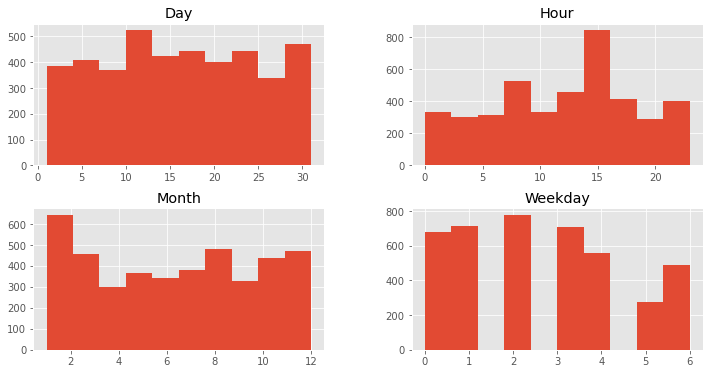

In [20]:
times = ['Month', 'Day', 'Hour', 'Weekday']
memes[times].hist(figsize=(12,6));

Более сложная картинка с разным числом бинов. 

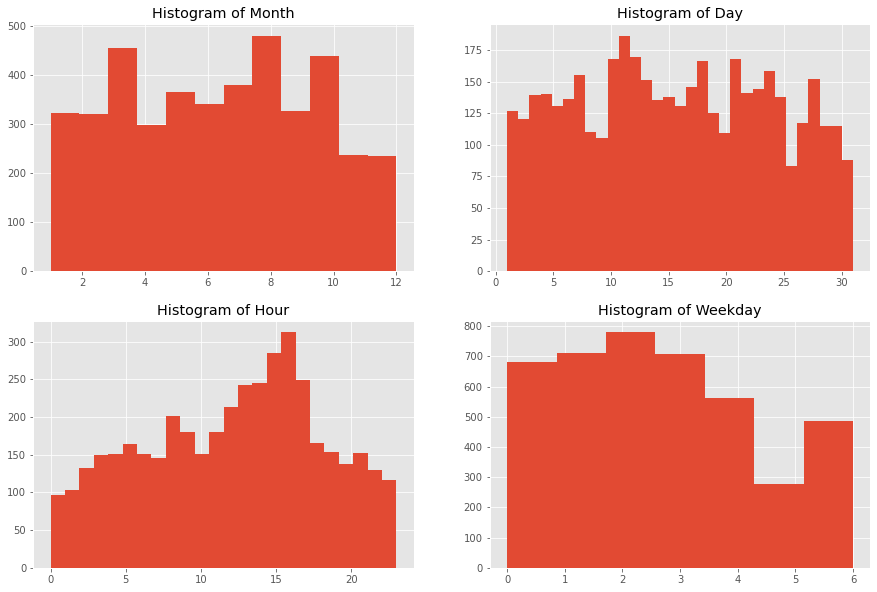

In [21]:
index = 0
fig, ax = plt.subplots(2, 2, figsize=(15,10))

bins = [12, 31, 24, 7]
for i in range(2):
    for j in range(2):
        ax[i,j].hist(memes[times[index]], bins = bins[index])
        ax[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1
        
fig.subplots_adjust(hspace = 0.2) 

__Интересные особенности:__

- День ничего необычного не принес, распределено достаточно равномерно
- Гистограмма часа достаточно показательная - в ночной период активность значительно снижается, а затем растет, достигая пика днём
- По дням недели есть заметное снижения на выходных

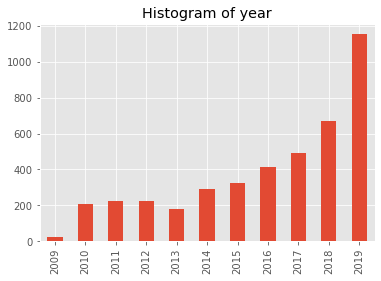

In [22]:
memes.Year.value_counts().sort_index().plot(kind='bar');
plt.title("Histogram of year");

Посмотрим также на вторую переменную, связанную с годом - __год появления первоисточника `origin_year`__

In [23]:
memes.origin_year.value_counts()[:10]

Unknown    349
2011       329
2016       310
2010       297
2017       281
2013       259
2019       258
2012       236
2014       233
2018       229
Name: origin_year, dtype: int64

In [24]:
memes.origin_year.value_counts()[-10:]

1809    1
1564    1
1812    1
1861    1
1932    1
1944    1
1580    1
1495    1
1415    1
1962    1
Name: origin_year, dtype: int64

In [25]:
memes.loc[memes.origin_year == 'Unknown', 'origin_year'] = None
memes.origin_year.isnull().sum()

349

In [26]:
usl = memes.origin_year.apply(lambda x: str(x).isdigit())

In [27]:
memes.loc[~usl,'origin_year'] = 0

In [28]:
memes.origin_year = memes.origin_year.astype(int)

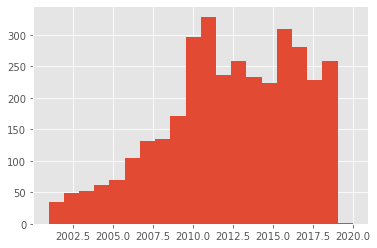

In [29]:
memes.origin_year[
    (memes.origin_year>2000)&(memes.origin_year<=2020)
].hist(bins=20);

Можем посмотреть на наиболее "исторические" мемы, берущие своё начало, например, до 1500 года

In [30]:
ancient = memes[ (memes.origin_year < 1500) & (memes.origin_year != 0) ]

for i in ancient.index.tolist():
    print("Name: {}".format(ancient.loc[i, "name"]))
    print("Year: {}".format(ancient.loc[i, "origin_year"]))
    print("About:\n{}".format(ancient.loc[i, "about"]))
    print("==================================================================\n")

Name: Pascal's Triangle
Year: 1100
About:
NOTE: This Entry was related to the 2013 April Fools joke. For more information, please check out the KYMdb Offline Crisis Response Initiative.

Name: Chocolate
Year: 1100
About:
Chocolate is a food item known for its sweet taste, its tendency to melt in a hot environment and its all-round delicious nature. Chocolate is typically produced using cocoa solids, sugar and other fats. Milk chocolate, as the name would suggest, is created using milk and is the most common type of chocolate available. In modern culture, chocolate is often lauded as being an incredible food in similar vein to Bacon (which leads to unexpected results when you combine the two)

Name: V Sign
Year: 1415
About:
NOTE: This Entry was related to the 2013 April Fools joke. For more information, please check out the KYMdb Offline Crisis Response Initiative.

Name: The Last Supper Parodies
Year: 1495
About:
nan

Name: Dented Guitar
Year: 1111
About:
1 for the money



## 3. Непрерывные переменные

> В этой части тетрадки мы будем работать с непрерывными переменными.

Посмотрим на __число просмотров.__

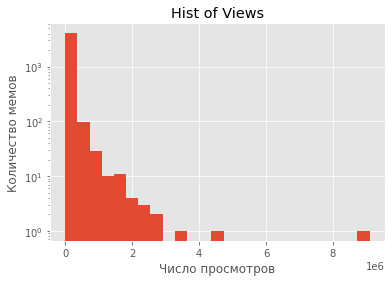

In [31]:
memes.views.hist(bins=25, log=True)

plt.xlabel('Число просмотров')
plt.ylabel('Количество мемов')
plt.title("Hist of Views");

Ожидаемо, большинство мемов не пользуются популярностью, и число их просмотров сосредоточено рядом с нулём. В то же время, у нас есть небольшое число очень популярных мемов, которые собирают десятки миллионов просмотров. 

В результате, мы имеем распределение с **тяжелым правым хвостом**. Чтобы познакомиться с распределением чуть получше, мы можем **прологарифмировать** значения переменной:

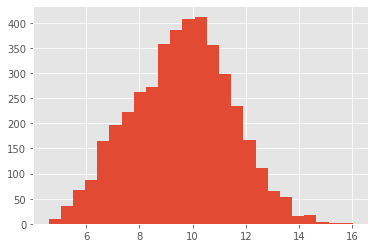

In [32]:
memes.views.apply(lambda w: np.log(w + 1)).hist(bins=25);

Выясним, какой мем самый популярный. Метрикой популярности, в данном случае, будет оценка среднего числа просмотров в день. Для этого разделим фактическое число просмотров на число дней, прошедших со дня публикации.

In [33]:
memes['average_views'] = memes.views/(memes.days_from_creation + 1)
memes['average_views'].max()

331509.73355084285

In [34]:
memes[memes['average_views']  == memes['average_views'].max()]['days_from_creation']

997    2.448125
Name: days_from_creation, dtype: float64

На ноль делить нельзя. 

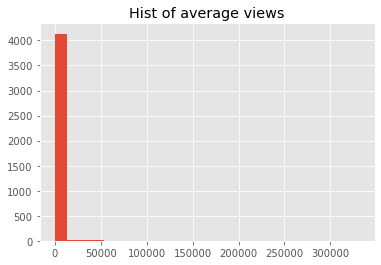

In [35]:
memes['average_views'].hist(bins=25)
plt.title("Hist of average views");

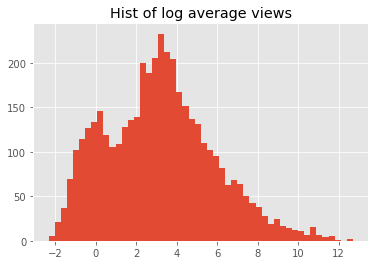

In [36]:
plt.hist(memes['average_views'].apply(np.log), bins=50)
plt.title("Hist of log average views");

Распределение числа просмотров за день оказывается мультимодальным (у него два локальных максимума, то есть две моды). 

Посмотрим на __комментарии.__

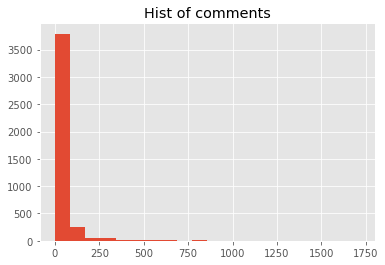

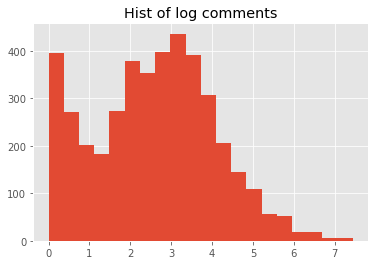

In [37]:
memes.comments.hist(bins=20)
plt.title("Hist of comments")
plt.show()

np.log(memes.comments + 1).hist(bins=20)
plt.title("Hist of log comments")
plt.show()

Посмотрим на самые комментируемые.

In [38]:
memes['average_comments'] = memes.comments/(memes.days_from_creation + 1)

In [39]:
popular = memes.sort_values(by='average_comments', ascending=False)

for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'name'])
    print("Average comments (per day) {}".format(round(popular.loc[i,'average_comments'])))
    print('==============\n')

Meme name: 
Miley Cyrus
Average comments (per day) 72.0

Meme name: 
McDonald’s "Happy" Mascot
Average comments (per day) 71.0

Meme name: 
Hero Cat
Average comments (per day) 50.0

Meme name: 
Colonel Meow
Average comments (per day) 47.0

Meme name: 
Bob the Builder
Average comments (per day) 47.0

Meme name: 
Mike Pence
Average comments (per day) 43.0

Meme name: 
Desmond Napoles
Average comments (per day) 35.0



In [40]:
100*memes.isnull().sum()/memes.shape[0]

name                   0.000000
status                 0.000000
type                  57.536852
origin_year            0.000000
origin_place           0.023776
date_added             0.000000
views                  0.000000
videos                 0.000000
photos                 0.000000
comments               0.000000
tags                   0.023776
about                  9.700428
origin                39.990490
other_text            16.595340
Timestamp              0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
Hour                   0.000000
Weekday                0.000000
days_from_creation     0.000000
average_views          0.000000
average_comments       0.000000
dtype: float64

## 4. Категориальные и тестовые переменные

> В этой части тетрадки мы будем работать с категориальными переменными и текстовыми переменными.

Посмотрим на описательные статистики по нашим категориальным переменным.

In [41]:
memes[['status', 'type', 'origin_place']].describe()

,status,type,origin_place
count,4206,1786,4205
unique,3,98,1885
top,Submission,Exploitable,Unknown
freq,2482,152,535


Для каждого мема есть три состояния:

- Submission - добавлен недавно или не еще не стал "признанным" в сообществе
- Deadpool - если умер и не используется
- Confirmed - активно используется и получил статус "подтвержденного" мема

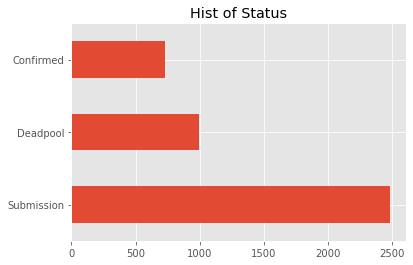

In [42]:
memes.status.value_counts().plot(kind='barh')
plt.title("Hist of Status")
plt.show()

Алгоритмы умеют учиться на числах. Надо заменить все категории на числа. Вопрос в том, как бы это лучше сделать. Наша переменная принимает три значения. Возникает соблазн заменить  все Submission на 1, Deadpool на 2, а Confirmed на 3. 

Это неправильный подход. Если так сделать, то некоторые алгоритмы могут подумать, что третий тип самый лучший, а первый самый плохой. Очень большой вопрос, почему мы определили порядок именно так. Это запутает алгоритм. 

Чтобы не путать алгоритм, поступают следующим образом: делают из категориальной переменной много __дамми-переменных__, то есть переменных, которые принимают значение либо $1$ либо $0$. Такая процедура называется __one hot encoding.__

In [43]:
pd.get_dummies(memes['status'], drop_first=True).head()

,Deadpool,Submission
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Если мем относится к типу Confirmed, то у него в соответствующем столбце будет стоять единичка, а в остальных нули. Если категорий внутри переменной много, то мы переработаем её в слишком большое число столбцов. Это приводит к очень большому пространству признаков и проклятью размерности.

В оставшихся двух переменных есть очень много вариантов категорий. Давайте посмотрим сколько и как они распределены. 

In [44]:
memes.type.value_counts()

Exploitable    152
Character      121
Catchphrase    112
Image Macro    111
Controversy     95
              ... 
Model            1
Filmmaker        1
Flash Mob        1
Scientist        1
Prank            1
Name: type, Length: 98, dtype: int64

Заменим все маленькие категории на `another`.

In [45]:
cnt = memes.type.value_counts()
big_category = set(cnt[cnt >= 30].index)
big_category

{'Anime',
 'Catchphrase',
 'Character',
 'Controversy',
 'Copypasta',
 'Exploitable',
 'Image Macro',
 'Parody',
 'Participatory Media',
 'Pop Culture Reference',
 'Reaction',
 'Remix',
 'Slang',
 'Song',
 'Video Game',
 'Viral Video'}

In [46]:
memes.type = memes.type.apply(lambda w: w if w in big_category else 'another')

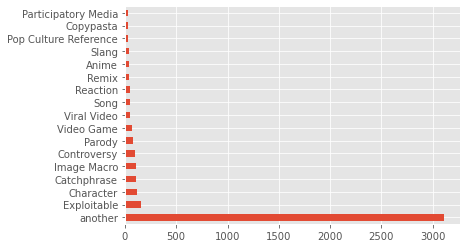

In [47]:
memes.type.value_counts().plot(kind='barh');

По аналогии поступим с местом происхождения мемам.

In [48]:
memes.origin_place.value_counts()

Unknown                       535
YouTube                       354
Twitter                       322
4chan                         179
Reddit                        141
                             ... 
Sunny Co Clothing               1
Archer (Television Series)      1
Andrew Gold                     1
Locats.com                      1
Indiana, United States          1
Name: origin_place, Length: 1885, dtype: int64

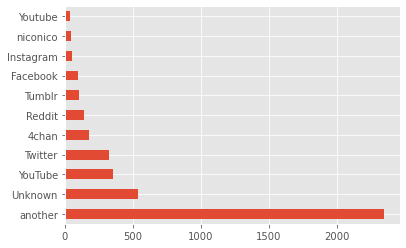

In [49]:
cnt = memes.origin_place.value_counts()
big_category = set(cnt[cnt >= 30].index)

memes['origin_place'] = memes.origin_place.apply(lambda w: w if w in big_category else 'another')
memes.origin_place.value_counts().plot(kind='barh');

Остались только текстовые переменные. На их основе тоже можно создать новые переменные. Например, посчитать длинну текстов или посмотреть входят ли в них какие-то специфические слова. В машинном обучении есть отдельный раздел, который посвящён работе с текстами. 

In [50]:
memes[['tags', 'about', 'origin', 'other_text']]

,tags,about,origin,other_text
0,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."
...,...,...,...,...
4201,"youtube poop, audio, harmonizer, remix, scary,...","The ""In G Major"" Youtube Poop fad, or Poopism,...",Chewiki credits Youtube Pooper Gallas as the o...,"However, even though Gallers played an influen..."
4202,none...,Blood Diamond Pants is a reference to the gene...,NaN,"""Godspeed"", the forum member who posted the or..."
4203,"michael j. fox, joke, image macro, 4chan, cele...","Because of Parkinson's (also known as ""Michael...",Michel J. Fox is an Canadian–American actor an...,The first instance of Michael J. Fox's equatio...
4204,"4chan, parrot, paranoia, paranoid parrot, advi...",Paranoid Parrot is an advice animal image macr...,"While the photographer is unknown, the origina...","In 2007, the same image was used to illustrate..."


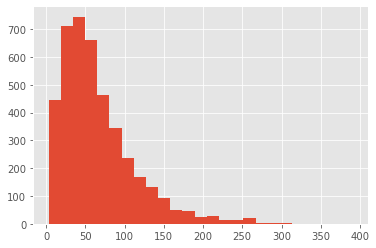

In [51]:
memes['tags_len'] = memes.tags.str.len()
memes['tags_len'].hist(bins=25);

Установим имя в качестве индекса и удалим все лишние колонки.

In [52]:
memes.set_index('name').loc['Wet Kylo Ren']

status                                                       Submission
type                                                        Image Macro
origin_year                                                        2019
origin_place                                                    another
date_added                                    2019-10-23T11:56:19-04:00
views                                                              5339
videos                                                                0
photos                                                               12
comments                                                              7
tags                  kylo ren, star wars the rise of skywalker, ada...
about                 Wet Kylo Ren is an image macro series based on...
origin                On October 21st, 2019, the final trailer for t...
other_text            Shortly after the trailer's release, some on T...
Timestamp                                     2019-10-23 11:56:1

In [53]:
memes.set_index('name', inplace=True)

memes.drop(['tags', 'about', 'origin', 'other_text',
           'date_added', 'Timestamp'], axis=1, inplace=True)

Посмотрим на число пропусков.

In [54]:
memes.isnull().sum()

status                0
type                  0
origin_year           0
origin_place          0
views                 0
videos                0
photos                0
comments              0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekday               0
days_from_creation    0
average_views         0
average_comments      0
tags_len              1
dtype: int64

Есть один пропуск в длине тэгов. Заполним его нулём.

In [55]:
memes.fillna(0, inplace=True) # заполним нулями

In [56]:
memes.shape

(4206, 17)

In [57]:
memes.to_csv('memes_prepare.csv', sep='\t')

Посмотрим, что произойдёт с данными, если мы применим ко всем категориальным переменным one hot encoding. 

In [58]:
memes.dtypes

status                 object
type                   object
origin_year             int64
origin_place           object
views                   int64
videos                  int64
photos                  int64
comments                int64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Weekday                 int64
days_from_creation    float64
average_views         float64
average_comments      float64
tags_len              float64
dtype: object

In [59]:
memes_dummy = pd.get_dummies(memes)
memes_dummy.shape

(4206, 45)

In [60]:
memes_dummy.head()

,origin_year,views,videos,photos,comments,Year,Month,Day,Hour,Weekday,...,origin_place_Facebook,origin_place_Instagram,origin_place_Reddit,origin_place_Tumblr,origin_place_Twitter,origin_place_Unknown,origin_place_YouTube,origin_place_Youtube,origin_place_another,origin_place_niconico
name,,,,,,,,,,,,,,,,,,,,,
Muvvafukka,2019,13613,0,7,8,2019,10,24,4,3,...,1,0,0,0,0,0,0,0,0,0
Martyrdom (Drop a Live Grenade When Killed),2007,13973,0,17,8,2019,10,23,12,2,...,0,0,0,0,0,0,0,0,1,0
Wet Kylo Ren,2019,5339,0,12,7,2019,10,23,11,2,...,0,0,0,0,0,0,0,0,1,0
You're Invited,2019,2249,0,0,0,2019,10,23,10,2,...,0,0,0,0,0,0,0,0,1,0
Companies Posting Their Own Names,2019,5662,0,16,33,2019,10,25,12,4,...,1,0,0,0,0,0,0,0,0,0


---



## 5. Больше графиков богу графиков

> Предположим, что в качестве целевой переменной (её мы бы хотели предсказывать) нас интересует среднее число просмотров мема. Давайте изучим эту переменную более подробно. 

Посмотрим как она взаимосвязана со статусом мема.

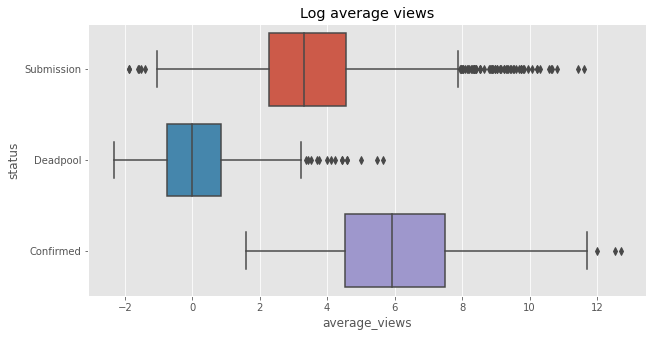

In [61]:
plt.figure(figsize=(10, 5))
sns.boxplot(np.log(memes.average_views), memes.status)
plt.title("Log average views")
plt.show()

Посмотрим как число просмотров ведёт себя в зависимости от часа добавления мема.

In [62]:
memes['log_average_views'] = np.log(memes.average_views)

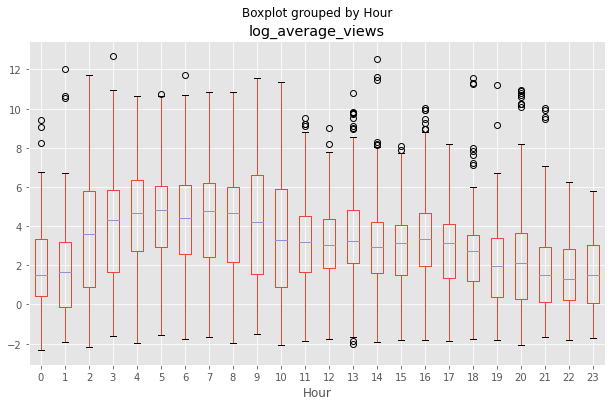

In [63]:
memes.boxplot(column='log_average_views', by='Hour', figsize=(10, 6))
plt.show()

Как ведёт себя среднее число просмотров в зависимости от дня недели, когда был добавлен мем. 

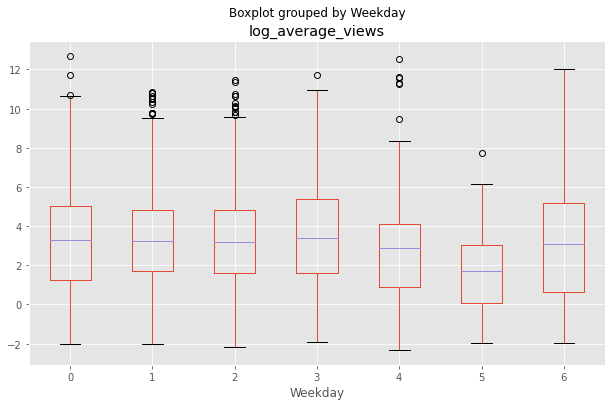

In [64]:
memes.boxplot(column='log_average_views', by='Weekday', figsize=(10, 6))
plt.show()

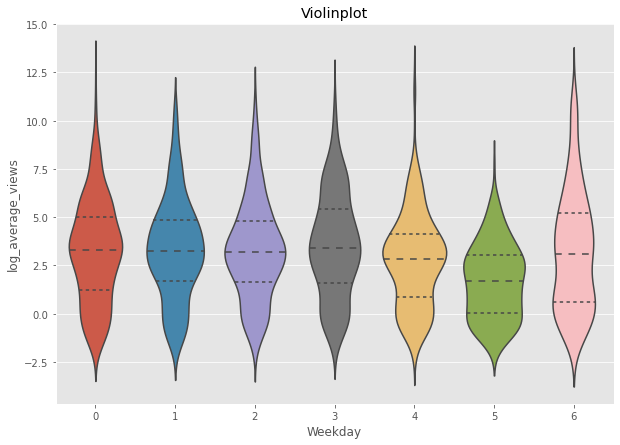

In [65]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Weekday', y='log_average_views', data=memes, inner="quartile")
plt.title("Violinplot")
plt.show()

Добавим дополнительное разбиение по статутсу мема. 

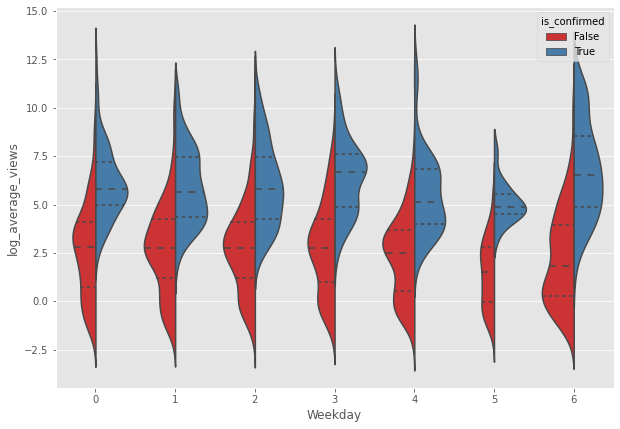

In [66]:
plt.figure(figsize=(10, 7))

memes['is_confirmed'] = memes.status=='Confirmed'

sns.violinplot(x="Weekday", 
                   y="log_average_views", 
                   hue='is_confirmed', 
                   data=memes, 
                   split=True, 
                   palette='Set1', 
                   inner='quartile')
plt.show()

Посмотрим на корреляции между переменными внутри данных. 

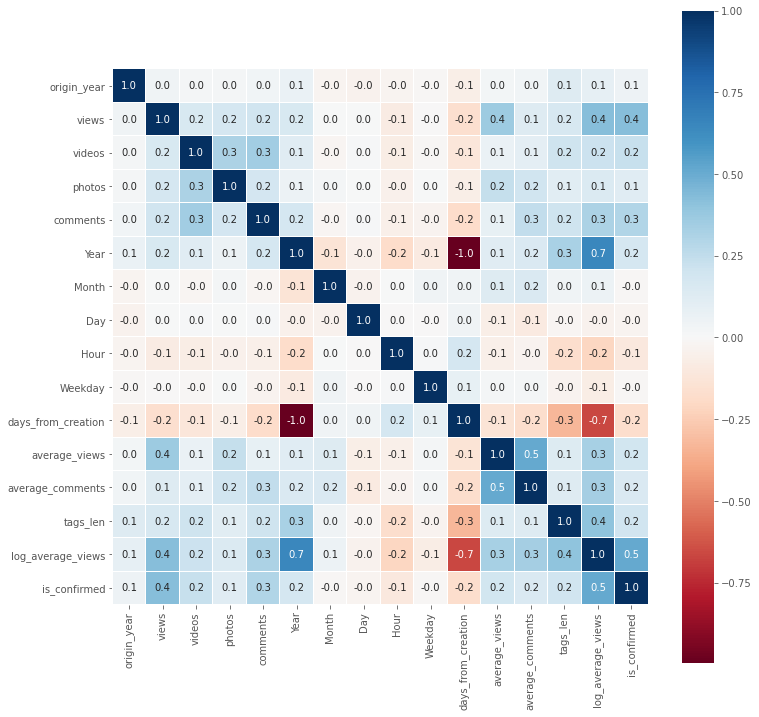

In [67]:
plt.subplots(figsize=(12, 12))

sns.heatmap(memes.corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

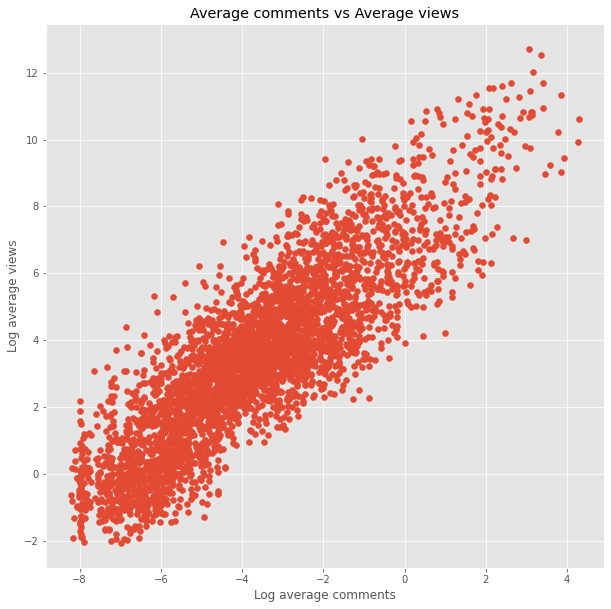

In [68]:
plt.figure(figsize=(10, 10))
plt.scatter(np.log(memes.average_comments), np.log(memes.average_views))
plt.title("Average comments vs Average views")
plt.ylabel("Log average views")
plt.xlabel("Log average comments")
plt.show()

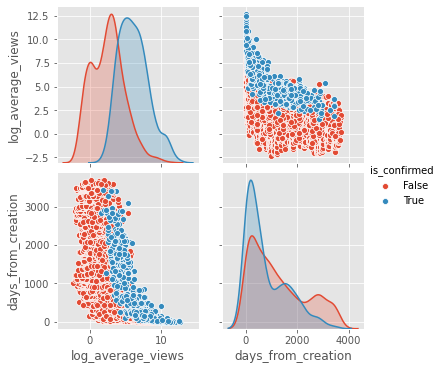

In [69]:
sns.pairplot(
    memes, 
    vars=['log_average_views', 'days_from_creation'],
    hue='is_confirmed'
)

Если мем оказался подтверждённым, происходит качественный сдвиг в числе просмотров. 

![](http://orig07.deviantart.net/3e62/f/2015/267/4/1/meme_team_logo_png_smol_by_kuiwi-d9ass0h.png)